<a href="https://colab.research.google.com/github/Srimanth1230/nlp/blob/main/Plant%20disease%20prediction%20using%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import image as mping
import glob
from sklearn import metrics
from skimage.feature import hog
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [ ]:
dir="/content/gdrive/MyDrive/Colab Notebooks/Dataset/"
categories=['Bacterial blight','Brown Spot','Copper Phytotoxicity','Downy mildew','Healthy','Powdery mildew','Powdery mildew and Rust','Rust and target spot','Southern blight','Soybean Mosaic Virus']

data=[]

for category in categories:
    path=os.path.join(dir,category)
    label=category
#     print(category)
    for img in os.listdir(path):  # List all the images in a directory
        imgpath=os.path.join(path,img)
        animal_image=np.array(mping.imread(imgpath))


        try:
            animal_image=cv2.resize(animal_image,(64,128))
            image_hog=hog(animal_image)
            # An image will be in a 2D array and now I am making it into a single 1-D array.

            data.append([image_hog,label])

        except Exception as e:
            pass
        # Many images are hard to resize so use a try and catch block.

print(len(data))
print(image_hog)

354
[0.2091809  0.         0.06028964 ... 0.07522915 0.         0.09882014]


In [ ]:
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
print(feature)

[0.2091809  0.         0.06028964 ... 0.07522915 0.         0.09882014]


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(features, labels, test_size=0.25,random_state=42)

print(X_test[0:5])

x_axis_k_points=[]

f1_euclidean=[]
accuracy_euclidean=[]
conf_euclidean=[]

for k in range(7):
    knn_euclidean=KNeighborsClassifier(n_neighbors=k+1)
    knn_euclidean.fit(X_train,Y_train)

    #prediction
    pred_labels_euclidean=knn_euclidean.predict(X_test)

    #Accuracy
    acc_euclidean=knn_euclidean.score(X_test,Y_test)
    accuracy_euclidean.append(acc_euclidean)

    #Confusion Matrix
    conf_euclidean.append(metrics.confusion_matrix(Y_test,pred_labels_euclidean))

    x_axis_k_points.append(k+1)

[array([0.17553285, 0.06347107, 0.03738812, ..., 0.08198466, 0.05073409,
       0.0616832 ]), array([0.24924866, 0.11744475, 0.25997131, ..., 0.0317876 , 0.08308648,
       0.05730592]), array([0.11896371, 0.00863389, 0.00253323, ..., 0.        , 0.00896398,
       0.15608343]), array([0.14515494, 0.02860706, 0.030663  , ..., 0.03170813, 0.03622643,
       0.03331745]), array([0.09948537, 0.04867061, 0.02403459, ..., 0.07262134, 0.00905233,
       0.03262547])]


In [ ]:
f1_manhattan=[]
accuracy_manhattan=[]
conf_manhattan=[]

for k in range(7):
    knn_manhattan=KNeighborsClassifier(n_neighbors=k+1,p=1)
    knn_manhattan.fit(X_train,Y_train)

    #prediction
    pred_labels_manhattan=knn_manhattan.predict(X_test)

    #Accuracy
    acc_manhattan=knn_manhattan.score(X_test,Y_test)
    accuracy_manhattan.append(acc_manhattan)

    #Confusion Matrix
    conf_manhattan.append(metrics.confusion_matrix(Y_test,pred_labels_manhattan))

#     x_axis_k_points.append(k+1)

In [ ]:
for i in range(len(f1_euclidean)):
    print('FOR K = ', i+1,',F1 SCORE =', f1_euclidean[i], ',ACCURACY = ', accuracy_euclidean[i],', \nCONFUSION MATRIX: \n', conf_euclidean)

In [ ]:
for i in range(len(f1_manhattan)):
    print('FOR K = ', i+1,',F1 SCORE =', f1_manhattan[i], ',ACCURACY = ', accuracy_manhattan[i],', \nCONFUSION MATRIX: \n', conf_manhattan)

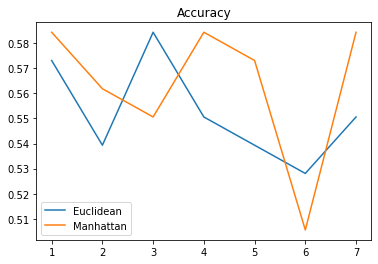

In [ ]:
plt.plot(x_axis_k_points,accuracy_euclidean,label='Euclidean')
plt.plot(x_axis_k_points,accuracy_manhattan,label='Manhattan')
plt.title("Accuracy")
plt.legend()
plt.show()

Image:  (1944, 2592, 3)


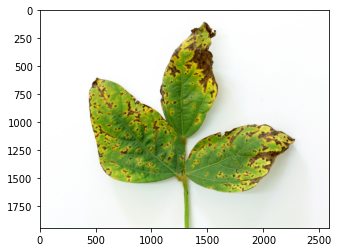

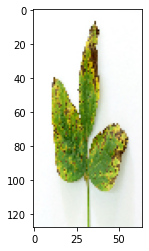

(128, 64, 3)
(6804,)
[0.         0.         0.         ... 0.01256038 0.03247151 0.05246251]
(128, 64)


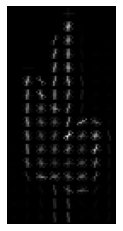

['Bacterial blight']


In [ ]:
img = np.array(mping.imread('/content/gdrive/MyDrive/Colab Notebooks/Dataset/Bacterial blight/Crestamento bacteriano (2).jpg'))
img.setflags(write=1)
print('Image: ',img.shape)
plt.imshow(img)
plt.show()

img_resize= cv2.resize(img,(64,128))
plt.imshow(img_resize)
plt.show()
print(img_resize.shape)

fd,hog_image=hog(img_resize, visualize=True, multichannel=True)
print(fd.shape)
print(fd)
print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()
input_pred=[fd]

pred_labels_euclidean=knn_euclidean.predict(input_pred)
print(pred_labels_euclidean)

#/content/gdrive/MyDrive/Colab Notebooks/Dataset/Bacterial blight/Crestamento bacteriano (2).jpg